The purpose of Pandas is to enable easy visualization and processing of data that is stored in panda data frame. 

Therefore, the first step will be : load data. 

In [151]:
import numpy as np
import pandas as pd

In [152]:
ls

Chapter 3 Classification_MNIST.ipynb  Pandas tutorial.ipynb  ign.csv*
Chapter2 Housing.ipynb                datasets/              thanksgiving.csv*


In [155]:
ign = pd.read_csv('ign.csv')

Next, we will need to be able to explore the data.To obtain a general view, including how many columns, whether there is missing data, what are the data types. 

In [156]:
ign.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [157]:
ign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18625 entries, 0 to 18624
Data columns (total 11 columns):
Unnamed: 0        18625 non-null int64
score_phrase      18625 non-null object
title             18625 non-null object
url               18625 non-null object
platform          18625 non-null object
score             18625 non-null float64
genre             18589 non-null object
editors_choice    18625 non-null object
release_year      18625 non-null int64
release_month     18625 non-null int64
release_day       18625 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 1.6+ MB


To be able to get access to different rows and/or columns, we will normally use .iloc or .loc. .iloc will retrieve the data based solely on the indexing, while .loc enable us to retrieve from labels.

In [158]:
ign.loc[1:5, "title"]

1    LittleBigPlanet PS Vita -- Marvel Super Hero E...
2                                 Splice: Tree of Life
3                                               NHL 13
4                                               NHL 13
5                            Total War Battles: Shogun
Name: title, dtype: object

We need to be able to obtain the summary statistics.

In [159]:
ign.iloc[1:5]

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


When we use .loc to retrieve a column, we obtained a pandas series.

In [160]:
ign_title = ign.loc[:,"title"]

In [161]:
type(ign_title)

pandas.core.series.Series

In [162]:
s1 = pd.Series([1, 2, 'test1', 'test2'])

In [163]:
s2 = pd.Series([2,3,4])

By combining two series into the dataframe class, we will be able to create a pandas data frame

In [164]:
pd.DataFrame([s1, s2])

,0,1,2,3
0,1.0,2.0,test1,test2
1,2.0,3.0,4,NaN


By passing different datatypes into pandas DataFrame, we will be able to create different data frame. We could also specify labels for some cases

In [165]:
pd.DataFrame(
    [
        [1,2,"test1", "test2"],
        [2,3,4]
    ], 
    index = ["row1", "row2"],
    columns = ["column1", "column2",  "column3", "column4"]
        )

,column1,column2,column3,column4
row1,1,2,test1,test2
row2,2,3,4,None


In [166]:
pd.DataFrame({
    "column1": [1,2,"test1", "test2"],
    "column2": [2,3,4,5]
}
)

,column1,column2
0,1,2
1,2,3
2,test1,4
3,test2,5


In [167]:
s1.head()

0        1
1        2
2    test1
3    test2
dtype: object

In [168]:
ign.corr()

,Unnamed: 0,score,release_year,release_month,release_day
Unnamed: 0,1.000000,0.035579,0.893394,-0.096676,0.010068
score,0.035579,1.000000,0.062716,0.007632,0.020079
release_year,0.893394,0.062716,1.000000,-0.115515,0.016867
release_month,-0.096676,0.007632,-0.115515,1.000000,-0.067964
release_day,0.010068,0.020079,0.016867,-0.067964,1.000000


In [169]:
ign.mean()

Unnamed: 0       9312.000000
score               6.950459
release_year     2006.515329
release_month       7.138470
release_day        15.603866
dtype: float64

In [170]:
ign_year_filter = ign[ign["release_year"] > 2006]

In [171]:
ign_year_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10225 entries, 0 to 18624
Data columns (total 11 columns):
Unnamed: 0        10225 non-null int64
score_phrase      10225 non-null object
title             10225 non-null object
url               10225 non-null object
platform          10225 non-null object
score             10225 non-null float64
genre             10189 non-null object
editors_choice    10225 non-null object
release_year      10225 non-null int64
release_month     10225 non-null int64
release_day       10225 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 958.6+ KB


In [172]:
ign_double_filter = ign[(ign["release_year"] > 2006) & (ign["release_month"] <7)]

In [173]:
ign_double_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4704 entries, 307 to 18624
Data columns (total 11 columns):
Unnamed: 0        4704 non-null int64
score_phrase      4704 non-null object
title             4704 non-null object
url               4704 non-null object
platform          4704 non-null object
score             4704 non-null float64
genre             4687 non-null object
editors_choice    4704 non-null object
release_year      4704 non-null int64
release_month     4704 non-null int64
release_day       4704 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 441.0+ KB


In [174]:
ign["platform"].unique()

array(['PlayStation Vita', 'iPad', 'Xbox 360', 'PlayStation 3',
       'Macintosh', 'PC', 'iPhone', 'Nintendo DS', 'Nintendo 3DS',
       'Android', 'Wii', 'PlayStation 4', 'Wii U', 'Linux',
       'PlayStation Portable', 'PlayStation', 'Nintendo 64', 'Saturn',
       'Lynx', 'Game Boy', 'Game Boy Color', 'NeoGeo Pocket Color',
       'Game.Com', 'Dreamcast', 'Dreamcast VMU', 'WonderSwan', 'Arcade',
       'Nintendo 64DD', 'PlayStation 2', 'WonderSwan Color',
       'Game Boy Advance', 'Xbox', 'GameCube', 'DVD / HD Video Game',
       'Wireless', 'Pocket PC', 'N-Gage', 'NES', 'iPod', 'Genesis',
       'TurboGrafx-16', 'Super NES', 'NeoGeo', 'Master System',
       'Atari 5200', 'TurboGrafx-CD', 'Atari 2600', 'Sega 32X', 'Vectrex',
       'Commodore 64/128', 'Sega CD', 'Nintendo DSi', 'Windows Phone',
       'Web Games', 'Xbox One', 'Windows Surface', 'Ouya',
       'New Nintendo 3DS', 'SteamOS'], dtype=object)

In [175]:
ign["platform"].value_counts()

PC                      3370
PlayStation 2           1686
Xbox 360                1631
Wii                     1366
PlayStation 3           1356
Nintendo DS             1045
PlayStation              952
Wireless                 910
iPhone                   842
Xbox                     821
PlayStation Portable     633
Game Boy Advance         623
GameCube                 509
Game Boy Color           356
Nintendo 64              302
Dreamcast                286
PlayStation 4            277
Nintendo DSi             254
Nintendo 3DS             225
Xbox One                 208
PlayStation Vita         155
Wii U                    114
iPad                      99
Lynx                      82
Macintosh                 81
Genesis                   58
NES                       49
TurboGrafx-16             40
Android                   39
Super NES                 33
NeoGeo Pocket Color       31
N-Gage                    30
Game Boy                  22
iPod                      17
Sega 32X      

In [176]:
PC = ign[ign["platform"]=="PC"]
ipad = ign[ign["platform"]=="iPad"]

In [177]:
PC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3370 entries, 7 to 18624
Data columns (total 11 columns):
Unnamed: 0        3370 non-null int64
score_phrase      3370 non-null object
title             3370 non-null object
url               3370 non-null object
platform          3370 non-null object
score             3370 non-null float64
genre             3367 non-null object
editors_choice    3370 non-null object
release_year      3370 non-null int64
release_month     3370 non-null int64
release_day       3370 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 315.9+ KB


In [178]:
ipad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 2 to 18338
Data columns (total 11 columns):
Unnamed: 0        99 non-null int64
score_phrase      99 non-null object
title             99 non-null object
url               99 non-null object
platform          99 non-null object
score             99 non-null float64
genre             99 non-null object
editors_choice    99 non-null object
release_year      99 non-null int64
release_month     99 non-null int64
release_day       99 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 9.3+ KB


In [179]:
% matplotlib inline

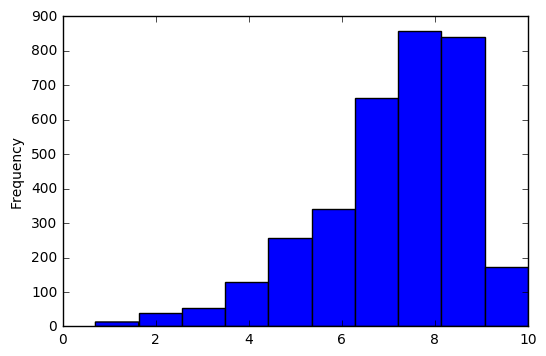

In [180]:
PC["score"].plot(kind = "hist")

In [181]:
thx_g = pd.read_csv('thanksgiving.csv', encoding="Latin-1")

In [182]:
thx_g.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [183]:
thx_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 65 columns):
RespondentID                                                                                                                                    1058 non-null int64
Do you celebrate Thanksgiving?                                                                                                                  1058 non-null object
What is typically the main dish at your Thanksgiving dinner?                                                                                    974 non-null object
What is typically the main dish at your Thanksgiving dinner? - Other (please specify)                                                           35 non-null object
How is the main dish typically cooked?                                                                                                          974 non-null object
How is the main dish typically cooked? - Other (please specify)          

In [184]:
thx_g.shape

(1058, 65)

In [185]:
gender_info = thx_g["What is your gender?"]

In [186]:
gender_info.value_counts(dropna=False)

Female    544
Male      481
NaN        33
Name: What is your gender?, dtype: int64

define a funciton, transform the  male into 0, female into 1, nan into nan

In [207]:
import math
def gender_code(gender_str):
    if isinstance(gender_str, float):
        if math.isnan(gender_str):
            return gender_str
    return gender_str == "Female"

In [208]:
gender_info_trans = gender_info.apply(gender_code)
gender_info_trans.value_counts(dropna=False)

True     544
False    481
NaN       33
Name: What is your gender?, dtype: int64

In [212]:
type(gender_info_trans)

pandas.core.series.Series